In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
def get_recent_form(data, team, n_matches=5):
    team_data = data[(data['home_team'] == team) | (data['away_team'] == team)].tail(n_matches)
    wins = 0
    draws = 0
    losses = 0
    for _, row in team_data.iterrows():
        if row['result'] == 1 and row['home_team'] == team:
            wins += 1
        elif row['result'] == -1 and row['away_team'] == team:
            wins += 1
        elif row['result'] == 0:
            draws += 1
        else:
            losses += 1

    return wins / n_matches, draws / n_matches, losses / n_matches

In [5]:
data = pd.read_csv("../data/csv_datasets/epl/all_seasons.csv")

In [6]:
le_home = LabelEncoder()
le_away = LabelEncoder()

In [7]:
data['home_team'] = le_home.fit_transform(data['home_team'])
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,Regular Season - 38,0,Everton,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,Regular Season - 38,5,West Ham,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,Regular Season - 38,7,Sunderland,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,Regular Season - 38,12,Tottenham,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,Regular Season - 38,14,Bournemouth,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [8]:
data['away_team'] = le_away.fit_transform(data['away_team'])
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,Regular Season - 38,0,9,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,Regular Season - 38,5,30,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,Regular Season - 38,7,25,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,Regular Season - 38,12,27,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,Regular Season - 38,14,2,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [9]:
data['game_week'] = data['game_week'].str.extract('(\d+)').astype(int)
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,38,0,9,3,1,2,...,22,15,6,1,51,4,0,6,428,366
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,38,5,30,1,2,1,...,14,14,5,3,56,2,0,0,489,374
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,38,7,25,5,1,1,...,7,15,1,1,30,1,0,3,269,211
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,38,12,27,1,7,0,...,19,5,3,0,66,0,0,3,600,520
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,38,14,2,1,1,0,...,10,10,1,1,52,1,0,4,446,350


In [10]:
data['result'] = np.sign(data['home_goals'] - data['away_goals'])
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes,result
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,38,0,9,3,1,2,...,15,6,1,51,4,0,6,428,366,1
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,38,5,30,1,2,1,...,14,5,3,56,2,0,0,489,374,-1
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,38,7,25,5,1,1,...,15,1,1,30,1,0,3,269,211,1
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,38,12,27,1,7,0,...,5,3,0,66,0,0,3,600,520,-1
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,38,14,2,1,1,0,...,10,1,1,52,1,0,4,446,350,0


In [11]:
scaling_factor = 2

data['home_recent_wins'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['home_recent_draws'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['home_recent_losses'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor
data['away_recent_wins'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['away_recent_draws'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['away_recent_losses'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_goalkeeper_saves,away_attempted_passes,away_successful_passes,result,home_recent_wins,home_recent_draws,home_recent_losses,away_recent_wins,away_recent_draws,away_recent_losses
0,17317,2016,2017-05-21T14:00:00+00:00,Emirates Stadium,38,0,9,3,1,2,...,6,428,366,1,0.8,1.2,0.0,0.0,1.2,0.8
1,17318,2016,2017-05-21T14:00:00+00:00,Turf Moor,38,5,30,1,2,1,...,0,489,374,-1,0.8,0.0,1.2,1.2,0.8,0.0
2,17319,2016,2017-05-21T14:00:00+00:00,Stamford Bridge,38,7,25,5,1,1,...,3,269,211,1,0.4,0.4,1.2,0.0,0.4,1.6
3,17320,2016,2017-05-21T14:00:00+00:00,KCOM Stadium,38,12,27,1,7,0,...,3,600,520,-1,0.8,0.4,0.8,0.4,0.8,0.8
4,17321,2016,2017-05-21T14:00:00+00:00,King Power Stadium,38,14,2,1,1,0,...,4,446,350,0,0.4,0.4,1.2,1.2,0.0,0.8


In [12]:
features = [
    'game_week',
    'home_team',
    'away_team',
    'home_shots_on_target',
    'home_shots',
    'home_fouls',
    'home_corners',
    'home_offsides',
    'home_possession',
    'home_yellow_cards',
    'home_red_cards',
    'home_goalkeeper_saves',
    'home_attempted_passes',
    'home_successful_passes',
    'away_shots_on_target',
    'away_shots',
    'away_fouls',
    'away_corners',
    'away_offsides',
    'away_possession',
    'away_yellow_cards',
    'away_red_cards',
    'away_goalkeeper_saves',
    'away_attempted_passes',
    'away_successful_passes',
    'home_recent_wins',
    'home_recent_draws',
    'home_recent_losses',
    'away_recent_wins',
    'away_recent_draws',
    'away_recent_losses'
]

ml_features = data[features]

ml_features

,game_week,home_team,away_team,home_shots_on_target,home_shots,home_fouls,home_corners,home_offsides,home_possession,home_yellow_cards,...,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes,home_recent_wins,home_recent_draws,home_recent_losses,away_recent_wins,away_recent_draws,away_recent_losses
0,38,0,9,9,17,10,4,0,49,2,...,0,6,428,366,0.8,1.2,0.0,0.0,1.2,0.8
1,38,5,30,1,9,11,2,0,44,2,...,0,0,489,374,0.8,0.0,1.2,1.2,0.8,0.0
2,38,7,25,8,28,8,11,0,70,1,...,0,3,269,211,0.4,0.4,1.2,0.0,0.4,1.6
3,38,12,27,4,10,14,2,2,34,0,...,0,3,600,520,0.8,0.4,0.8,0.4,0.8,0.8
4,38,14,2,4,20,11,9,5,48,4,...,0,4,446,350,0.4,0.4,1.2,1.2,0.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,32,15,21,6,18,9,9,2,81,0,...,0,2,148,78,0.8,0.4,0.8,0.0,0.4,1.6
2593,32,19,27,8,25,7,9,2,57,0,...,0,2,401,317,1.6,0.0,0.4,0.4,0.8,0.8
2594,33,13,14,3,13,14,3,4,41,4,...,0,2,444,324,0.0,0.4,1.6,0.4,0.4,1.2
2595,33,31,8,3,9,13,6,2,41,5,...,0,2,434,357,1.2,0.4,0.4,1.2,0.4,0.4


In [13]:
ml_target = data['result']

ml_target

0       1
1      -1
2       1
3      -1
4       0
       ..
2592    1
2593    1
2594    0
2595    1
2596    1
Name: result, Length: 2597, dtype: int64

In [14]:
ml_features_train, ml_features_test, ml_target_train, ml_target_test = train_test_split(ml_features, ml_target, test_size=0.2, random_state=42)

clf = KNeighborsClassifier()
clf.fit(ml_features_train, ml_target_train)

model_test = clf.predict(ml_features_test)

In [15]:
cv_scores = cross_val_score(clf, ml_features, ml_target, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.43461538 0.46153846 0.44123314 0.42003854 0.42003854]
Mean cross-validation score: 0.4355


In [16]:
accuracy = accuracy_score(ml_target_test, model_test)
precision = precision_score(ml_target_test, model_test, average='weighted')
recall = recall_score(ml_target_test, model_test, average='weighted')
f1 = f1_score(ml_target_test, model_test, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

Accuracy: 40.96%
Precision: 43.74%
Recall: 40.96%
F1-score: 41.29%


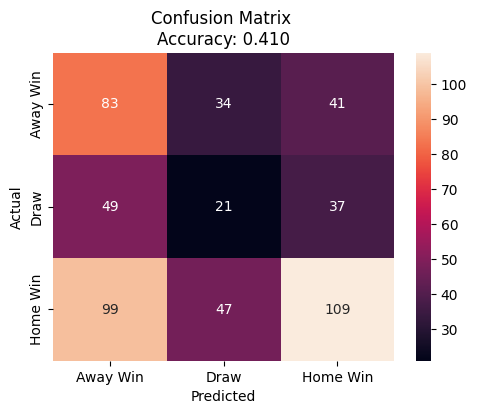

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ml_target_test, model_test)
cm_df = pd.DataFrame(cm, index=['Away Win', 'Draw', 'Home Win'], columns=['Away Win', 'Draw', 'Home Win'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix \nAccuracy: {0:.3f}'.format(accuracy_score(ml_target_test, model_test)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
def predict_outcome(home_team, away_team):
    home_recent_wins, home_recent_draws, home_recent_losses = get_recent_form(data, le_home.transform([home_team])[0])
    away_recent_wins, away_recent_draws, away_recent_losses = get_recent_form(data, le_away.transform([away_team])[0])
    
    input_data = np.array([
        [1, le_home.transform([home_team])[0], le_away.transform([away_team])[0]] + [0] * 22 +
        [home_recent_wins * scaling_factor, home_recent_draws * scaling_factor, home_recent_losses * scaling_factor,
        away_recent_wins * scaling_factor, away_recent_draws * scaling_factor, away_recent_losses * scaling_factor]
    ])
    prediction = clf.predict(input_data)[0]
    probabilities = clf.predict_proba(input_data)[0]
    return prediction, probabilities

In [19]:
fixtures = [
    ['Arsenal', 'Southampton'],
    ['Fulham', 'Leeds'],
    ['Manchester United', 'Chelsea'],
    ['Crystal Palace', 'Everton'],
    ['Liverpool', 'Nottingham Forest'],
    ['Brentford', 'Aston Villa'],
    ['Leicester', 'Wolves'],
    ['Brighton', 'Manchester City'],
    ['Newcastle', 'Tottenham'],
    ['Bournemouth', 'West Ham'],
    ]

for fixture in fixtures:
    home_team = fixture[0]
    away_team = fixture[1]
    prediction, probabilities = predict_outcome(home_team, away_team)

    print(f"{home_team} (Home) Win - {probabilities[2] * 100:.2f}%")
    print(f"{away_team} (Away) Win - {probabilities[0] * 100:.2f}%")
    print(f"Draw - {probabilities[1] * 100:.2f}%\n")

Arsenal (Home) Win - 20.00%
Southampton (Away) Win - 20.00%
Draw - 60.00%

Fulham (Home) Win - 20.00%
Leeds (Away) Win - 20.00%
Draw - 60.00%

Manchester United (Home) Win - 20.00%
Chelsea (Away) Win - 20.00%
Draw - 60.00%

Crystal Palace (Home) Win - 20.00%
Everton (Away) Win - 20.00%
Draw - 60.00%

Liverpool (Home) Win - 20.00%
Nottingham Forest (Away) Win - 20.00%
Draw - 60.00%

Brentford (Home) Win - 20.00%
Aston Villa (Away) Win - 20.00%
Draw - 60.00%

Leicester (Home) Win - 20.00%
Wolves (Away) Win - 20.00%
Draw - 60.00%

Brighton (Home) Win - 20.00%
Manchester City (Away) Win - 20.00%
Draw - 60.00%

Newcastle (Home) Win - 20.00%
Tottenham (Away) Win - 20.00%
Draw - 60.00%

Bournemouth (Home) Win - 20.00%
West Ham (Away) Win - 20.00%
Draw - 60.00%

